In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

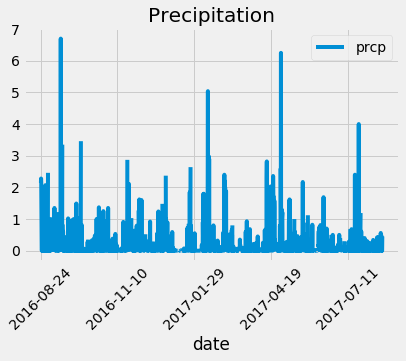

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date=session.query(func.Max(Measurement.date)).all()[0][0]

# Calculate the date 1 year ago from the last data point in the database
last_year=dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
results=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(results).set_index('date')

# Sort the dataframe by date
df=df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=45)
plt.title('Precipitation')
plt.savefig('Precipitation_for_A_Year.png')

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
#Station Analysis
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
                .order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

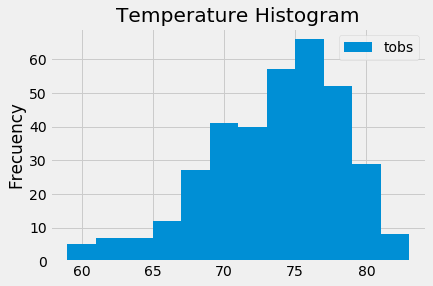

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempHis=session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date >= last_year).all()
pd.DataFrame(tempHis).hist(bins=12, label="tobs")
plt.ylabel("Frecuency")
plt.title("Temperature Histogram")
plt.legend()
plt.savefig("Temperature Obeservation")

# Tempeture Analysis I

In [22]:
engine.execute('SELECT * FROM Measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [25]:
session.query(Measurement.date).\
    filter(Measurement.date > '2010-02-15').\
    order_by(Measurement.date).all()

[('2010-02-16'),
 ('2010-02-16'),
 ('2010-02-16'),
 ('2010-02-16'),
 ('2010-02-16'),
 ('2010-02-16'),
 ('2010-02-16'),
 ('2010-02-17'),
 ('2010-02-17'),
 ('2010-02-17'),
 ('2010-02-17'),
 ('2010-02-17'),
 ('2010-02-17'),
 ('2010-02-17'),
 ('2010-02-18'),
 ('2010-02-18'),
 ('2010-02-18'),
 ('2010-02-18'),
 ('2010-02-18'),
 ('2010-02-19'),
 ('2010-02-19'),
 ('2010-02-19'),
 ('2010-02-19'),
 ('2010-02-19'),
 ('2010-02-19'),
 ('2010-02-19'),
 ('2010-02-20'),
 ('2010-02-20'),
 ('2010-02-20'),
 ('2010-02-20'),
 ('2010-02-20'),
 ('2010-02-20'),
 ('2010-02-20'),
 ('2010-02-21'),
 ('2010-02-21'),
 ('2010-02-21'),
 ('2010-02-21'),
 ('2010-02-21'),
 ('2010-02-21'),
 ('2010-02-22'),
 ('2010-02-22'),
 ('2010-02-22'),
 ('2010-02-22'),
 ('2010-02-22'),
 ('2010-02-22'),
 ('2010-02-23'),
 ('2010-02-23'),
 ('2010-02-23'),
 ('2010-02-23'),
 ('2010-02-23'),
 ('2010-02-23'),
 ('2010-02-23'),
 ('2010-02-24'),
 ('2010-02-24'),
 ('2010-02-24'),
 ('2010-02-24'),
 ('2010-02-24'),
 ('2010-02-24'),
 ('2010-02-24'

In [23]:
session = Session(engine)

In [26]:
temp = [func.avg(Measurement.tobs)]
June_averages = session.query(*temp).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
June_averages

[(74.94411764705882)]

In [ ]:
temp = [func.avg(Measurement.tobs)]
Dic_averages = session.query(*temp).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
Dic_averages

In [27]:
import scipy.stats as stats

In [28]:
June_Columns=session.query(Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "06").\
order_by(Measurement.date).all()

In [29]:
June_Columns

[(78.0),
 (74.0),
 (73.0),
 (77.0),
 (69.0),
 (76.0),
 (71.0),
 (74.0),
 (70.0),
 (76.0),
 (76.0),
 (72.0),
 (76.0),
 (70.0),
 (76.0),
 (71.0),
 (76.0),
 (78.0),
 (78.0),
 (75.0),
 (74.0),
 (77.0),
 (67.0),
 (76.0),
 (72.0),
 (78.0),
 (73.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (70.0),
 (73.0),
 (72.0),
 (74.0),
 (68.0),
 (77.0),
 (74.0),
 (72.0),
 (73.0),
 (78.0),
 (76.0),
 (79.0),
 (79.0),
 (78.0),
 (75.0),
 (75.0),
 (73.0),
 (77.0),
 (77.0),
 (79.0),
 (74.0),
 (77.0),
 (75.0),
 (74.0),
 (76.0),
 (77.0),
 (71.0),
 (69.0),
 (75.0),
 (78.0),
 (75.0),
 (75.0),
 (79.0),
 (77.0),
 (73.0),
 (77.0),
 (71.0),
 (78.0),
 (75.0),
 (73.0),
 (79.0),
 (72.0),
 (78.0),
 (73.0),
 (80.0),
 (75.0),
 (79.0),
 (75.0),
 (75.0),
 (77.0),
 (72.0),
 (78.0),
 (75.0),
 (75.0),
 (78.0),
 (83.0),
 (76.0),
 (77.0),
 (76.0),
 (81.0),
 (75.0),
 (78.0),
 (75.0),
 (74.0),
 (70.0),
 (76.0),
 (74.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (78.0),
 (79.0),
 (77.0),
 (77.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (71.0),
 

In [34]:
Dec_Columns=session.query(Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "12").\
order_by(Measurement.date).all()

In [32]:
Dec_Columns

[(76.0),
 (73.0),
 (73.0),
 (72.0),
 (78.0),
 (72.0),
 (70.0),
 (71.0),
 (72.0),
 (73.0),
 (75.0),
 (71.0),
 (74.0),
 (71.0),
 (74.0),
 (70.0),
 (74.0),
 (73.0),
 (71.0),
 (70.0),
 (74.0),
 (72.0),
 (74.0),
 (67.0),
 (74.0),
 (74.0),
 (72.0),
 (78.0),
 (74.0),
 (75.0),
 (77.0),
 (73.0),
 (71.0),
 (73.0),
 (78.0),
 (66.0),
 (69.0),
 (69.0),
 (64.0),
 (66.0),
 (64.0),
 (66.0),
 (78.0),
 (61.0),
 (61.0),
 (65.0),
 (61.0),
 (64.0),
 (64.0),
 (71.0),
 (66.0),
 (76.0),
 (69.0),
 (58.0),
 (66.0),
 (62.0),
 (67.0),
 (66.0),
 (62.0),
 (67.0),
 (73.0),
 (65.0),
 (60.0),
 (68.0),
 (63.0),
 (77.0),
 (75.0),
 (70.0),
 (76.0),
 (74.0),
 (77.0),
 (71.0),
 (77.0),
 (73.0),
 (66.0),
 (65.0),
 (64.0),
 (68.0),
 (63.0),
 (67.0),
 (65.0),
 (65.0),
 (64.0),
 (69.0),
 (69.0),
 (64.0),
 (72.0),
 (69.0),
 (72.0),
 (72.0),
 (67.0),
 (68.0),
 (71.0),
 (70.0),
 (75.0),
 (70.0),
 (65.0),
 (69.0),
 (68.0),
 (69.0),
 (70.0),
 (69.0),
 (75.0),
 (67.0),
 (68.0),
 (66.0),
 (80.0),
 (71.0),
 (78.0),
 (69.0),
 (71.0),
 

In [ ]:
#A paired t-test is designed to compare the means of the same group or item under two separate scenarios. 
#An unpaired t-test compares the means of two independent or unrelated groups. 
#In an unpaired t-test, the variance between groups is assumed to be equal.

In [33]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(June_Columns,Dec_Columns, equal_var=True)

Ttest_indResult(statistic=array([31.60372399]), pvalue=array([3.9025129e-191]))

In [ ]:
#As the p-value is higher than 0.05 we cannot reject t null hyphotesis that means are the same. 

# Tempeture Analysis II

In [17]:
#temperature analysis 2

# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
mytrip=calc_temps('2016-02-28', '2016-03-05')[0]

In [19]:
mytrip[2]

80.0

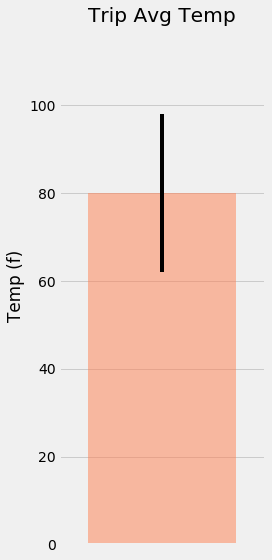

In [20]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax=plt.subplots(figsize=plt.figaspect(2.))
xpos=1
yerr=mytrip[2] - mytrip[0]

bar=ax.bar(xpos,mytrip[2],yerr=yerr,alpha=0.5,color='coral',align='center')
ax.set(xticks=range(xpos),xticklabels='a',title='Trip Avg Temp',
       ylabel='Temp (f)')
ax.margins(.2,.2)
fig.tight_layout()

In [24]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [21]:
#Daily Rainfall Average

# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.


# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

ws_rainfall = \
session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp).\
filter(Measurement.station == Station.station).\
filter(Measurement.date >= '2016-02-28').\
filter(Measurement.date <= '2016-03-05').\
group_by(Measurement.station).\
order_by(Measurement.prcp.desc()).all()
print(ws_rainfall)

[('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.0), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]


## Optional Challenge Assignment

In [40]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [42]:
#set the start and end date for the trip
startDate = "2018-04-08"
endDate = "2018-04-19"
#calculate trip length
startNum = int(startDate[-2:])
endNum = int(endDate[-2:])
tripLength = endNum - startNum + 1
#start date as datetime object
startDate = dt.datetime.strptime(startDate, '%Y-%m-%d')
#list dates (MM-DD) of trip
dateList = [dt.datetime.strftime(startDate + dt.timedelta(days = x), '%m-%d')
            for x in range(0, tripLength)]
#calculate normals for each date
tripNormals = [daily_normals(date) for date in dateList]
tripNormals

[[(66.0, 72.10526315789474, 77.0)],
 [(62.0, 71.6140350877193, 78.0)],
 [(64.0, 71.40350877192982, 79.0)],
 [(65.0, 72.49180327868852, 82.0)],
 [(65.0, 72.22413793103448, 80.0)],
 [(64.0, 71.52542372881356, 79.0)],
 [(65.0, 72.75, 81.0)],
 [(61.0, 71.79310344827586, 79.0)],
 [(62.0, 71.55357142857143, 81.0)],
 [(65.0, 71.93103448275862, 77.0)],
 [(67.0, 72.49152542372882, 77.0)],
 [(65.0, 72.42105263157895, 83.0)]]

In [43]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
#extract normals into a list of lists
tripNormals = [np.array(normal[0]) for normal in tripNormals]
#convert normals list into a data frame
normalsTable = pd.DataFrame(tripNormals)
#add date column
normalsTable["Date"] = dateList
#set index and rename columns
normalsTable = normalsTable.set_index("Date")
normalsTable = normalsTable.rename(columns={0: "Low Temp", 1: "Avg Temp", 2: "High Temp"})
normalsTable

,Low Temp,Avg Temp,High Temp
Date,,,
04-08,66.0,72.105263,77.0
04-09,62.0,71.614035,78.0
04-10,64.0,71.403509,79.0
04-11,65.0,72.491803,82.0
04-12,65.0,72.224138,80.0
04-13,64.0,71.525424,79.0
04-14,65.0,72.750000,81.0
04-15,61.0,71.793103,79.0
04-16,62.0,71.553571,81.0


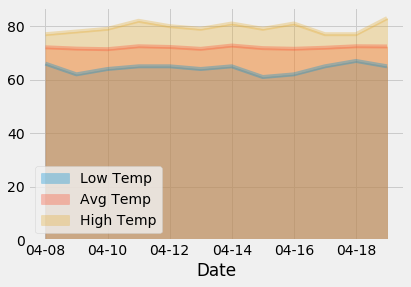

In [44]:
# Plot the daily normals as an area plot with `stacked=False`
normalsTable.plot.area(stacked=False, alpha=.333)